In [ ]:
Instacart Market Basket Analysis – Visual Exploration of Data

The project consists in exploring data provided by Instacart on customer orders over time 
to predict which previously purchased products will be in the user’s next order. 

The data for the study is in the form of csv files: orders.csv, order_product_prior.csv, 
order_product_train.csv, products.csv, ailes.csv and departments.csv

orders.csv, order_product_prior.csv and prodcuts.csv were merged to display the information by 
user id. and compare quantities and possible patterns.  

The resulting merged DataFrame presents interesting insights:
    
• The number of times an individual user made a purchase
• The products that were purchased at one particular order
• Time of day and day of the week in which an individual user placed an order
• Products that were reordered by the user.

Some of the questions that emerged from the data comparison are:
    
• Are there any patterns in the type of products purchased?
• Are there any patterns in the time of day and day of the week when users placed their order?
• Are there any patterns in the type of products that were reordered that can be used to make future predictions?

To start the investigation, bar and scatter plots were chosen to show relationship and 
possible correlations between type of products and time patterns in purchasing behavior of users. 

Further investigation in the relationship between time and day of purchase, and type 
of product ordered might give interesting insights in what would be next in a user basket cart.


In [1]:
import pandas as pd
import numpy as np

filename = 'orders.csv'
data = pd.read_csv(filename)
sample_data = data.head(5)

In [2]:
# Importing of csv files using Pandas

filename_products_prior = 'C:/Users/Owner/Documents/data_science/first_capstone_project/instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv'
products_prior = pd.read_csv(filename_products_prior)
filename_products = 'C:/Users/Owner/Documents/data_science/first_capstone_project/instacart-market-basket-analysis/products.csv/products.csv'
products = pd.read_csv(filename_products)

In [3]:
#Merging of Pandas three DataFrames into one sorted_sample DataFrame

merged_sample = pd.merge(sample_data, products_prior[['product_id','add_to_cart_order','order_id','reordered']], on='order_id', how='inner')
product_merged_sample = pd.merge(merged_sample, products[['product_name','product_id']], on='product_id',how='inner').drop('product_id',axis=1)
product_merged_sample = product_merged_sample[['user_id','order_id','order_number','product_name','add_to_cart_order', 'order_dow', 'order_hour_of_day','days_since_prior_order', 'reordered']]
sorted_sample = product_merged_sample.sort_values(by='order_number')
print(sorted_sample)

    user_id  order_id  order_number                             product_name  \
0         1   2539329             1                                     Soda   
13        1   2539329             1         XL Pick-A-Size Paper Towel Rolls   
5         1   2539329             1  Organic Unsweetened Vanilla Almond Milk   
6         1   2539329             1                      Original Beef Jerky   
11        1   2539329             1               Aged White Cheddar Popcorn   
1         1   2398795             2                                     Soda   
19        1   2398795             2                   Bag of Organic Bananas   
12        1   2398795             2               Aged White Cheddar Popcorn   
7         1   2398795             2                      Original Beef Jerky   
15        1   2398795             2                               Pistachios   
21        1   2398795             2                    Cinnamon Toast Crunch   
8         1    473747             3     

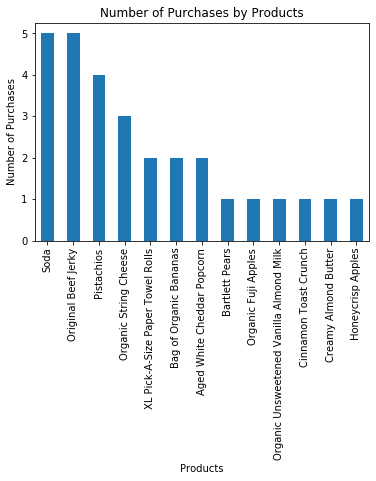

In [7]:
#Bar plot showing Number of Purchases by product of user_id 1
import matplotlib.pyplot as plt
sorted_sample['product_name'].value_counts().plot(kind='bar')
plt.title('Number of Purchases by Products')
plt.xlabel('Products')
plt.ylabel('Number of Purchases')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

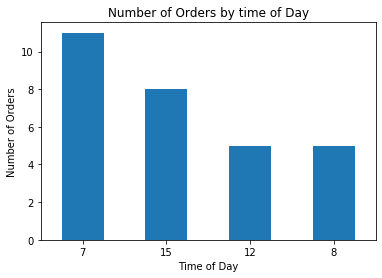

In [5]:
#Bar plot showing Number of Orders by time of day of user_id 1
product_count =  sorted_sample[['product_name','order_hour_of_day']]
x = product_count['order_hour_of_day'].value_counts().plot(kind = 'bar', x='Time of Day', rot=0, y='Number of Purchases')
plt.title('Number of Orders by time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.show

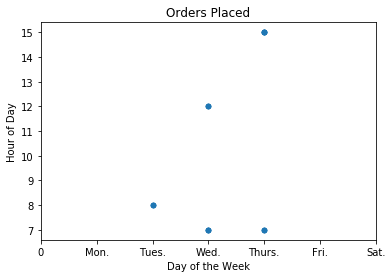

In [6]:
# Scatter plot showing orders placed by day of week of user_id 1

import numpy as np
import matplotlib.pyplot as plt
ax = sorted_sample.plot(x='order_dow', y='order_hour_of_day', kind='scatter', xticks=([w*1 for w in range(7)]))
ax.set_xticklabels([0, 'Mon.','Tues.','Wed.', 'Thurs.','Fri.','Sat.','Sun.'])
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.title('Orders Placed')
plt.show()